In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Load and explore the dataset
print("=== HOUSING DATA ANALYSIS ===")
df = pd.read_csv('Housing.csv')
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())

=== HOUSING DATA ANALYSIS ===
Dataset shape: (545, 13)

First 5 rows:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Dataset info:
<class 'pandas

In [2]:
# 2. Data Preprocessing
print("\n=== DATA PREPROCESSING ===")

# Convert categorical variables to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                   'airconditioning', 'prefarea', 'furnishingstatus']

# Create a copy for preprocessing
df_processed = df.copy()

# Binary encoding for yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea']
for col in binary_cols:
    df_processed[col] = df_processed[col].map({'yes': 1, 'no': 0})

# Label encoding for furnishingstatus
le = LabelEncoder()
df_processed['furnishingstatus'] = le.fit_transform(df_processed['furnishingstatus'])

print("Encoded values for furnishingstatus:")
for i, category in enumerate(le.classes_):
    print(f"{category}: {i}")

print("\nProcessed dataset info:")
print(df_processed.info())
print("\nProcessed dataset head:")
print(df_processed.head())


=== DATA PREPROCESSING ===
Encoded values for furnishingstatus:
furnished: 0
semi-furnished: 1
unfurnished: 2

Processed dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB
None

Processed dataset head:
      price  a


=== EXPLORATORY DATA ANALYSIS ===


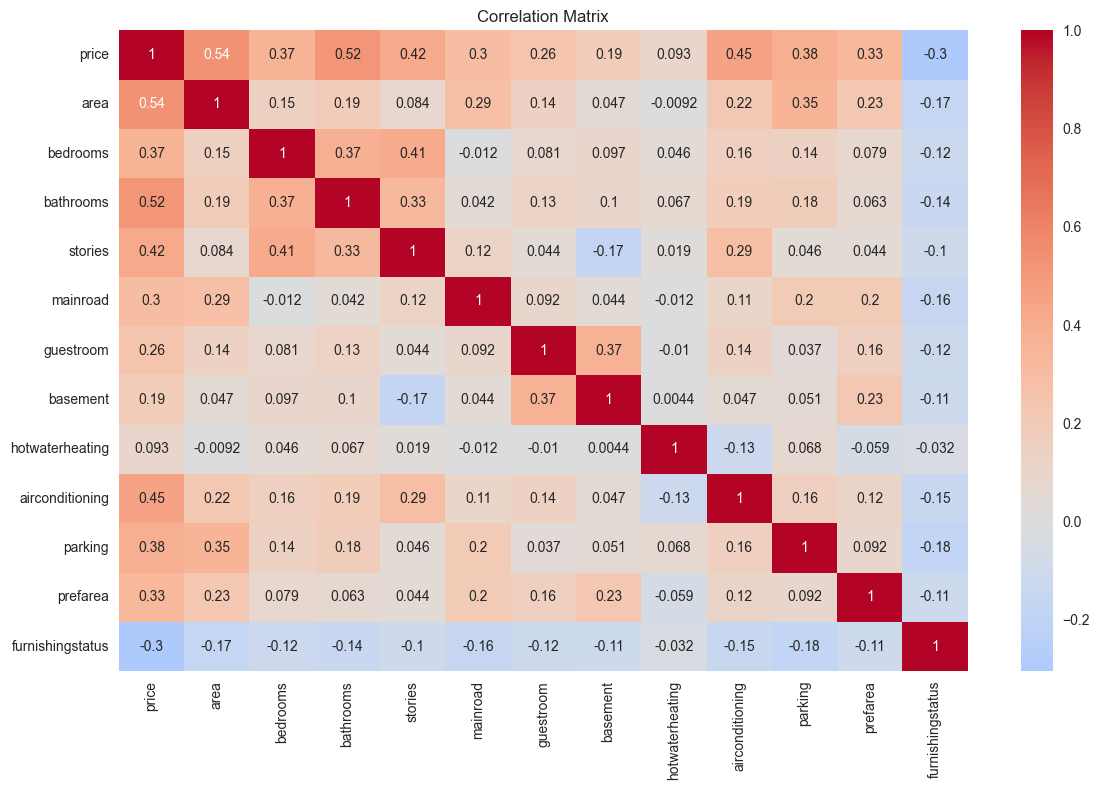

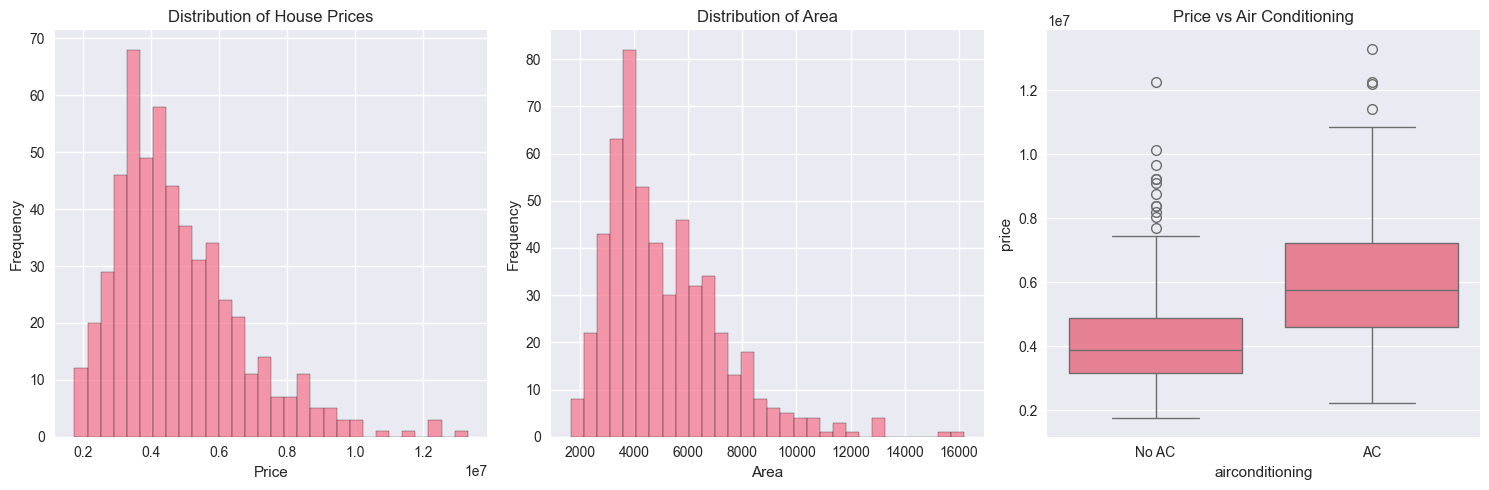

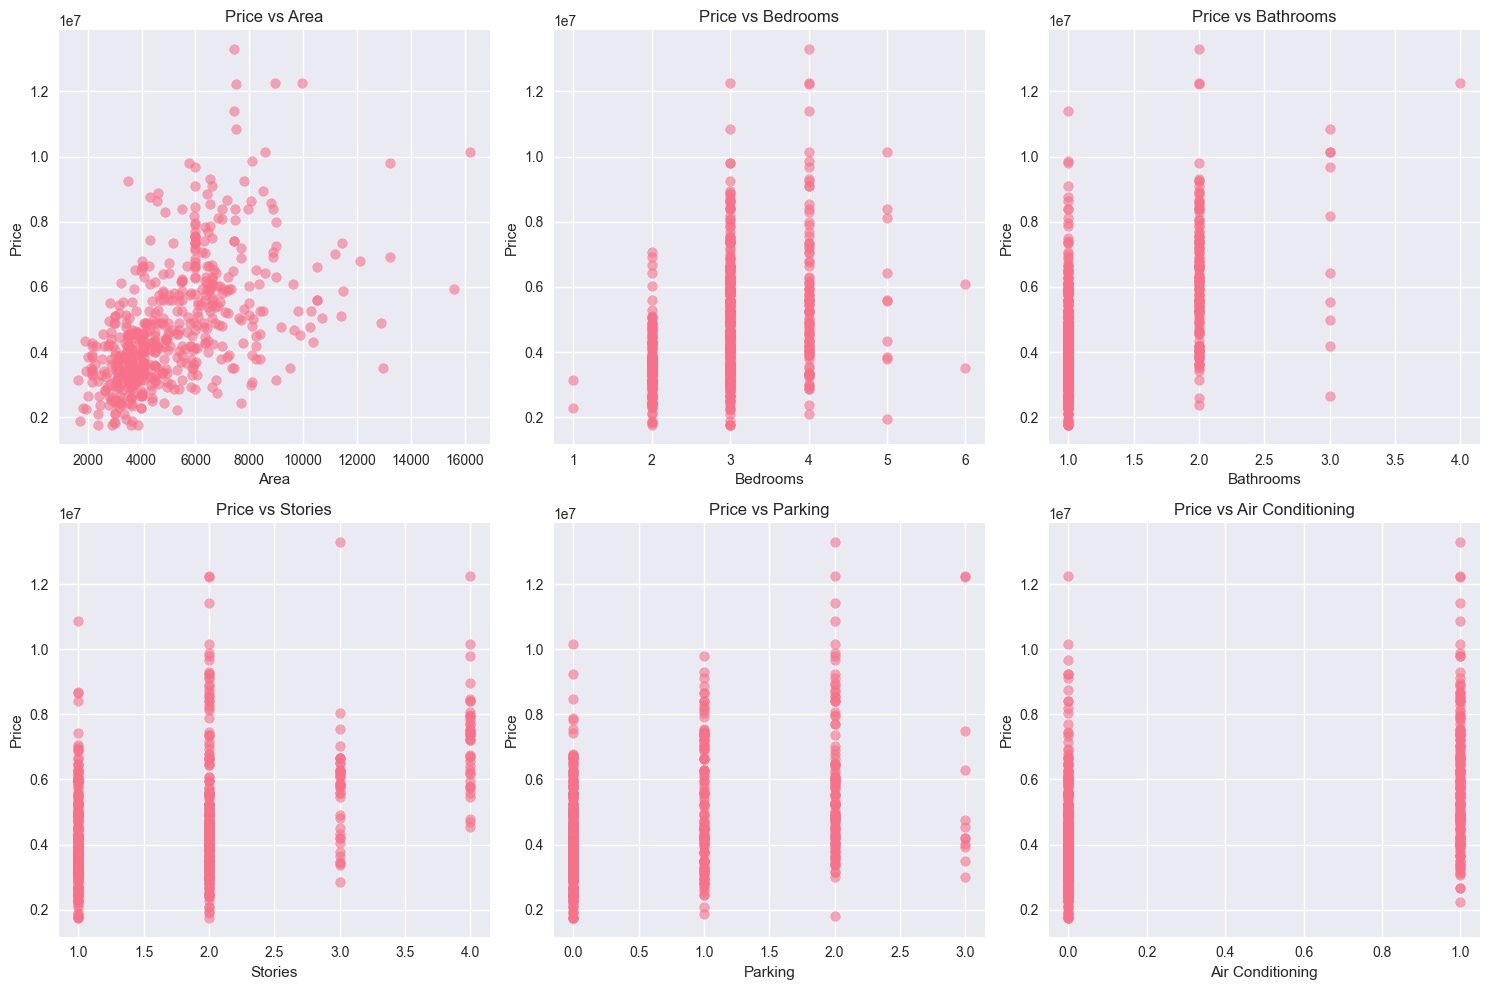

In [3]:
# 3. Exploratory Data Analysis
print("\n=== EXPLORATORY DATA ANALYSIS ===")

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df_processed.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Distribution of target variable (price)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df_processed['price'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')

plt.subplot(1, 3, 2)
plt.hist(df_processed['area'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.title('Distribution of Area')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_processed, x='airconditioning', y='price')
plt.title('Price vs Air Conditioning')
plt.xticks([0, 1], ['No AC', 'AC'])

plt.tight_layout()
plt.show()

# Scatter plots for key numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
features_to_plot = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'airconditioning']
feature_names = ['Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Parking', 'Air Conditioning']

for i, (feature, name) in enumerate(zip(features_to_plot, feature_names)):
    row, col = i // 3, i % 3
    axes[row, col].scatter(df_processed[feature], df_processed['price'], alpha=0.6)
    axes[row, col].set_xlabel(name)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Price vs {name}')

plt.tight_layout()
plt.show()